# Capstone Mental Health

In [1]:
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random

[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [3]:
df = pd.read_csv("Dataset-Mental-Disorders.csv")
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [4]:
df.describe()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
count,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
unique,120,4,4,4,4,2,3,2,2,2,2,2,2,2,2,9,8,9,4
top,Patiant-01,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-2
freq,1,42,46,38,44,63,63,74,73,63,62,70,62,61,65,22,33,21,31


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

## Feature Engineering

In [6]:
df['Expert Diagnose'].value_counts()

Bipolar Type-2    31
Depression        31
Normal            30
Bipolar Type-1    28
Name: Expert Diagnose, dtype: int64

In [7]:
df['Suicidal thoughts'].value_counts()

NO      63
YES     56
YES      1
Name: Suicidal thoughts, dtype: int64

In [8]:
df['Suicidal thoughts'] = df['Suicidal thoughts'].replace('YES ', "YES")

In [9]:
df['Suicidal thoughts'].value_counts()

NO     63
YES    57
Name: Suicidal thoughts, dtype: int64

In [10]:
df['Sadness'].value_counts()

Usually       42
Sometimes     42
Most-Often    20
Seldom        16
Name: Sadness, dtype: int64

In [11]:
df['Euphoric'].value_counts()

Seldom        46
Sometimes     45
Usually       20
Most-Often     9
Name: Euphoric, dtype: int64

In [12]:
df['Sexual Activity'].value_counts()

5 From 10    22
4 From 10    20
3 From 10    17
6 From 10    15
2 From 10    15
7 From 10    14
8 From 10    11
1 From 10     4
9 From 10     2
Name: Sexual Activity, dtype: int64

In [13]:
df['Optimisim'].value_counts()

6 From 10    21
5 From 10    20
4 From 10    19
2 From 10    18
3 From 10    18
7 From 10     8
8 From 10     8
1 From 10     6
9 From 10     2
Name: Optimisim, dtype: int64

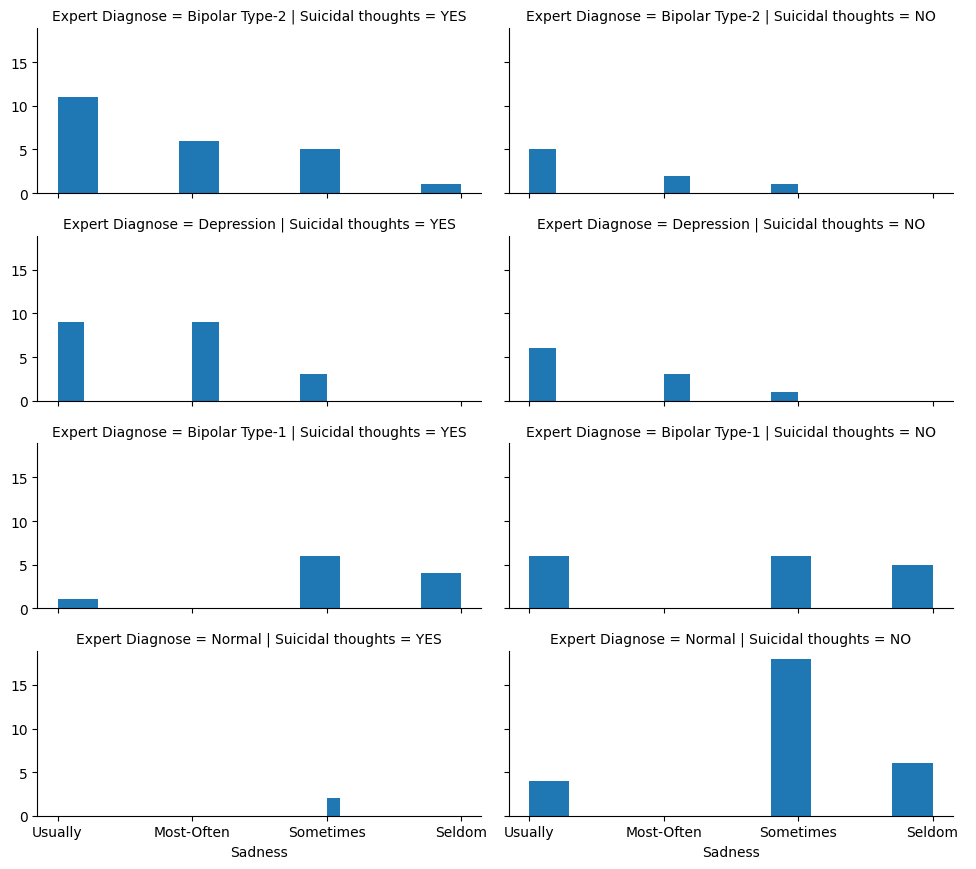

In [14]:
grid = sns.FacetGrid(df, col='Suicidal thoughts', row='Expert Diagnose', height=2.2, aspect=2.2)
grid.map(plt.hist, 'Sadness')
grid.add_legend()

In [15]:
df = df.drop('Patient Number', axis=1)
df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [16]:
df['Expert Diagnose'] = df['Expert Diagnose'].map({'Normal': 0, 
                                                   'Bipolar Type-1': 1,
                                                  'Bipolar Type-2': 2,
                                                  'Depression': 3}).astype(int)
df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,3
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,0


In [17]:
yes_no_cols = ['Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking']
for col in yes_no_cols:
    df[col] = df[col].map({'YES': 1, 'NO': 0}).astype(int)

In [18]:
df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,2
1,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,3
2,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,1
3,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,2
4,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,0


In [19]:
usually_cols = ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder']
for col in usually_cols:
    df[col] = df[col].map({'Seldom': 0,
                            'Sometimes': 1,
                            'Usually': 2,
                            'Most-Often': 3}).astype(int)


In [20]:
df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,2,0,1,1,1,1,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,2
1,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,3
2,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,1
3,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,2
4,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,0


In [21]:
df = df.drop(columns=['Sexual Activity'])

In [22]:
rentang_cols = [#'Sexual Activity',
                 'Concentration', 'Optimisim']
for col in rentang_cols:
    df[col] = df[col].map({'1 From 10': 0,
                            '2 From 10': 1,
                            '3 From 10': 2,
                            '4 From 10': 3,
                            '5 From 10': 4,
                            '6 From 10': 5,
                            '7 From 10': 6,
                            '8 From 10': 7,
                            '9 From 10': 8}).astype(int)
    

In [23]:
df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Concentration,Optimisim,Expert Diagnose
0,2,0,1,1,1,1,0,0,1,0,0,1,1,1,2,3,2
1,2,0,2,1,0,1,0,0,0,0,0,0,0,0,1,4,3
2,1,3,1,1,1,0,0,0,1,1,0,1,1,0,4,6,1
3,2,0,2,3,1,1,1,0,1,0,0,0,0,0,1,1,2
4,2,2,1,1,0,0,0,0,0,0,0,1,1,1,4,5,0


## Data Preparation

In [24]:
X = df.drop(columns=['Expert Diagnose'],axis=1)
y = df['Expert Diagnose']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
X_train.shape

(96, 16)

In [27]:
y_train.shape

(96,)

In [28]:
X_test.shape

(24, 16)

In [29]:
y_test.shape

(24,)

## Build Model


In [30]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import random
from tensorflow.keras.utils import to_categorical

In [31]:

# Menetapkan random seed agar hasil eksperimen tidak berubah
np.random.seed(42)  # Menetapkan random seed untuk NumPy
random.seed(42)  # Menetapkan random seed untuk modul random Python
tf.random.set_seed(42)  # Menetapkan random seed untuk TensorFlow

# Normalisasi fitur (penting untuk neural network)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:

# Mengubah label target menjadi one-hot encoding
y_train = to_categorical(y_train)  # Convert ke one-hot encoding
y_test = to_categorical(y_test)

In [33]:
# Menentukan jumlah kelas
n_classes = y_train.shape[1]  # Berdasarkan ukuran one-hot encoded target

# Membangun model deep learning
model = Sequential()

# Lapisan input (jumlah unit sesuai dengan jumlah fitur, yaitu 17)
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Menambahkan Dropout untuk regularisasi
model.add(Dropout(0.2))  # 50% neuron akan di-dropout selama pelatihan

# Lapisan tersembunyi
model.add(Dense(64, activation='relu'))

# Menambahkan Dropout untuk regularisasi
model.add(Dropout(0.5))  # 50% neuron akan di-dropout selama pelatihan

# Lapisan output (jumlah neuron sesuai dengan jumlah kelas)
model.add(Dense(n_classes, activation='softmax'))  # Softmax untuk multi-class

# Mengkompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2176      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 10,692
Trainable params: 10,692
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Melatih model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
3/3 [==============================] - 1s 112ms/step - loss: 1.5216 - accuracy: 0.1667 - val_loss: 1.3774 - val_accuracy: 0.2083
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 1.3993 - accuracy: 0.2917 - val_loss: 1.3135 - val_accuracy: 0.3333
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 1.3213 - accuracy: 0.3333 - val_loss: 1.2545 - val_accuracy: 0.5417
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 1.2395 - accuracy: 0.4583 - val_loss: 1.2024 - val_accuracy: 0.6250
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 1.1694 - accuracy: 0.5417 - val_loss: 1.1552 - val_accuracy: 0.6667
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 1.0798 - accuracy: 0.6042 - val_loss: 1.1102 - val_accuracy: 0.7083
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 1.0387 - accuracy: 0.6562 - val_loss: 1.0690 - val_accuracy: 0.7917
Epoch 8/100
3/3 [==

In [36]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Melakukan prediksi
predictions = model.predict(X_test)

# Mengonversi hasil prediksi ke kelas yang sesuai
predicted_classes = np.argmax(predictions, axis=1)

# Menampilkan beberapa prediksi
print(predicted_classes)


1/1 [==============================] - 0s 24ms/step - loss: 0.5068 - accuracy: 0.8750
Loss: 0.5068027377128601, Accuracy: 0.875
1/1 [==============================] - 0s 80ms/step
[3 2 0 3 0 3 0 0 3 3 3 1 1 2 0 2 3 2 1 2 3 2 3 3]


In [37]:

# Misalnya, 'model' adalah model Keras yang telah dilatih
# Mengonversi model Keras ke model TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Mengonversi model
tflite_model = converter.convert()

# Menyimpan model TFLite ke file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\gadwi\AppData\Local\Temp\tmpih_ah76n\assets


INFO:tensorflow:Assets written to: C:\Users\gadwi\AppData\Local\Temp\tmpih_ah76n\assets


In [38]:
# Save the model in HDF5 format
model.save('my_model.h5')

print("Model saved as my_model.h5")

Model saved as my_model.h5
